# 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

In [7]:
# Logistic Map 
def logistic(x, r):
    return r*x*(1-x)

#f^3 logistic map
def logistic_3(x,r):
    return logistic(logistic(logistic(x,r),r),r)

Code to test iterations of the logistic difference equation for differing values of control parameter r. The logistic map displays rich dynamical behaviour. As the control parameter r (0 < r < 4) varies, we observe period doubling bifurcations.

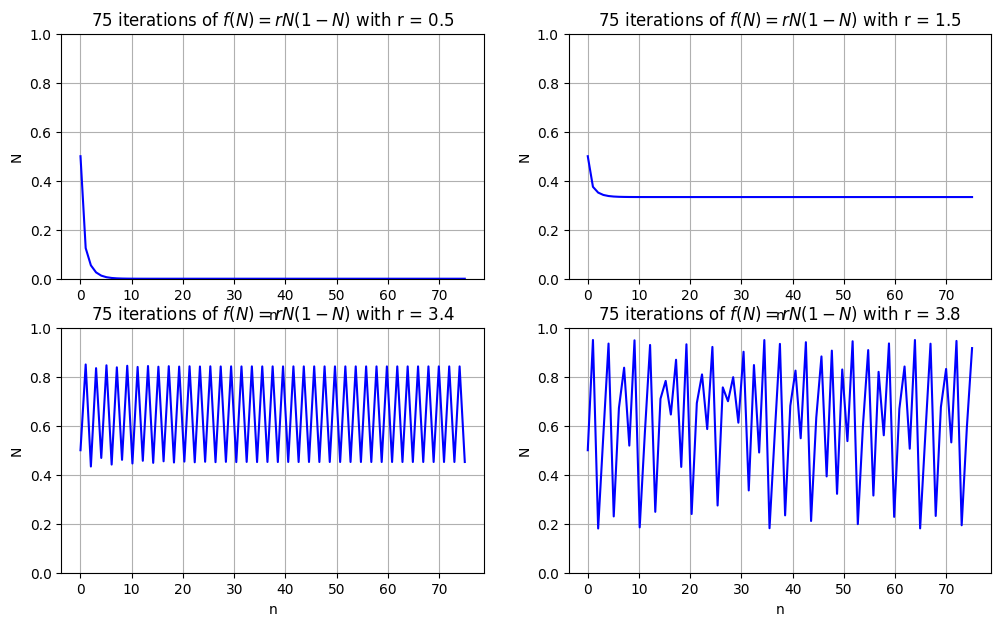

In [25]:
# map iterations

### Inital Data 
initial = 0.5 # Inital Value 
n = 75 # Iterations 

### Arrays 
x = np.linspace(0,n,n)
y = np.zeros_like(x)
y[0] = initial

fig,ax = plt.subplots(2,2,figsize = (12,7))

### Iterate
r_values = [0.5, 1.5, 3.4, 3.8]
for j, r in enumerate(r_values):
    for i in range(1,n):
        y[i] = logistic(y[i-1],r)

    ### Plot
    row, col = divmod(j, 2)
    ax[row, col].plot(x,y,'b')
    ax[row, col].set_ylim(0,1)
    ax[row, col].set_title(f'{n} iterations of $f(N) = rN(1-N) $ with r = {r}')
    ax[row, col].set_xlabel('n')
    ax[row, col].set_ylabel('N')
    ax[row, col].grid()
plt.show()


Plot to illustrate intermittency in the logistic map. 
Code partly adapted from Christian: https://scipython.com/blog/cobweb-plots/

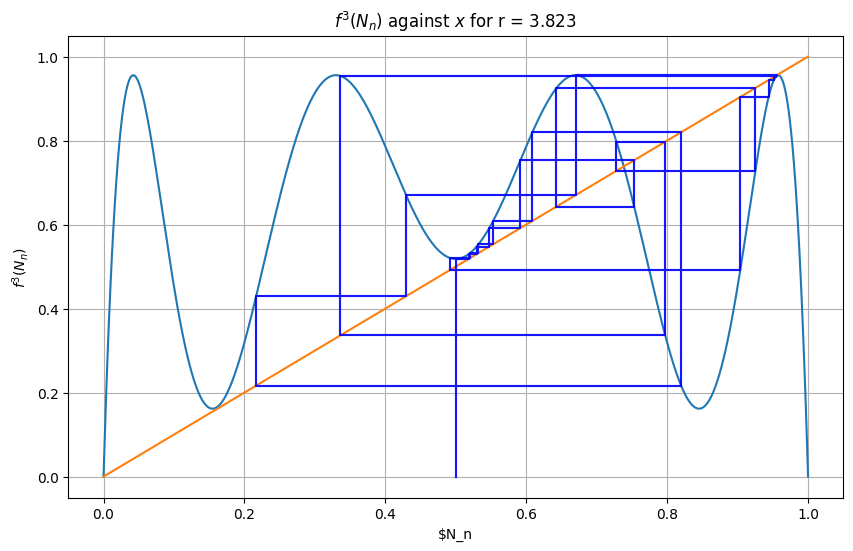

In [2]:
# cobweb


# Parameters 
r = 3.823
x = np.linspace(0,1,500)

# Plot
fig,ax = plt.subplots(1,figsize = (10,6))
nmax = 50           # Max cobweb iterations 
x0 = 0.5            # Initial Point 
ax.plot(x,f3(x,r))  # Period-3 Map
ax.plot(x,x)        # y = N 

# Cobweb 
px, py = np.empty((2,nmax+1,2))
px[0], py[0] = x0, 0
for n in range(1, nmax, 2):
    px[n] = px[n-1]
    py[n] = logistic_3(px[n-1], r)
    px[n+1] = py[n]
    py[n+1] = py[n]
ax.plot(px, py, c='b', alpha=0.7)

# Plot   
ax.set_title(f'$f^3(N_n)$ against $x$ for r = {r}')
ax.set_xlabel('$N_n')
ax.set_ylabel('$f^3(N_n)$')

# Toggle to zoom in to see intermittency 
# ax.set_ylim(0.4,0.6)
# ax.set_xlim(0.4,0.6)
ax.grid()
plt.show()


Plot of a Bifurcation Diagram of the Logistic map. Credit: https://ipython-books.github.io


/var/folders/_m/40jm_4wj5hscmh202vkys0r80000gn/T/ipykernel_63120/2404827440.py:5: RuntimeWarning: overflow encountered in multiply
  return r*x*(1-x)


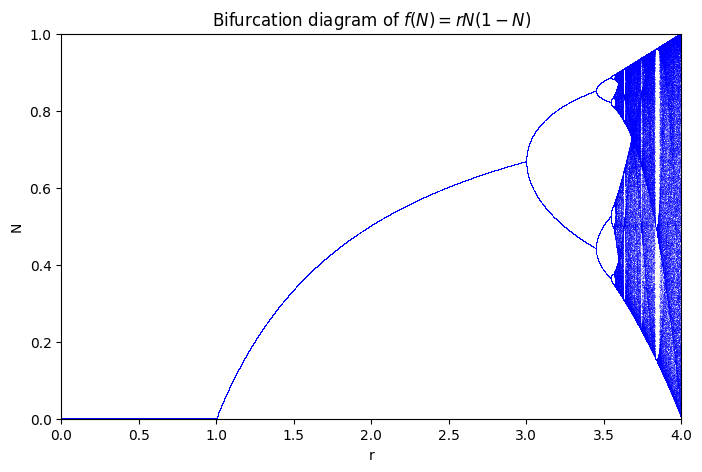

In [5]:
#bifurcation

# Define iterations 
n = 100000
iterations = 1000
last = 100

# Define Range of parameters
r = np.linspace(0, 25, n)
x = 1e-5 * np.ones(n)

# Iterate 
fig, ax1 = plt.subplots( 1, figsize=(8, 5),sharex=True)
for i in range(iterations):
    x = logistic(x, r)
    if i >= (iterations - last):
        ax1.plot(r, x, ',b', alpha=.25)
# Plot
ax1.set_xlim(0,4)
ax1.set_ylim(0,1)
ax1.set_title("Bifurcation diagram of $f(N) = rN(1 - N)$")
ax1.set_xlabel('r')
ax1.set_ylabel('N')
plt.show()


Plot to illustrate Tangent Bifurcation. Can vary values of r. Tangent point is $r = 1 + \sqrt{8}$

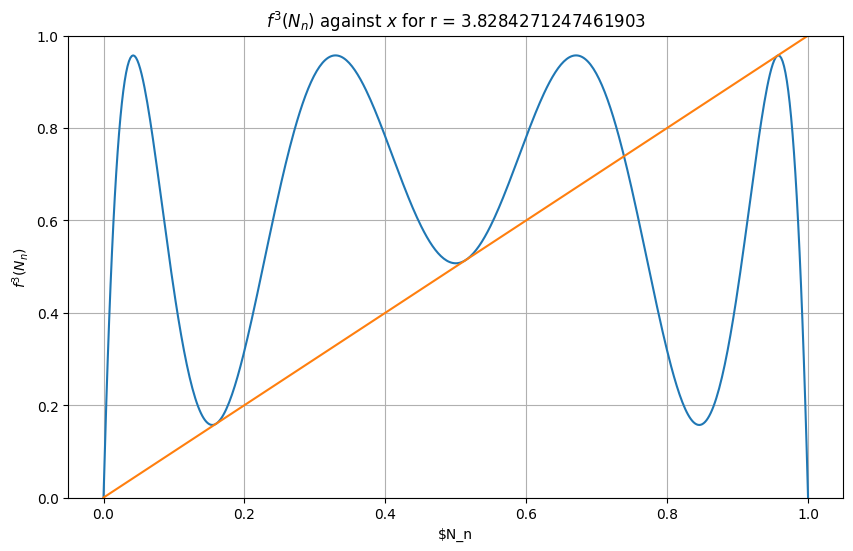

In [8]:

# tangent bifur
# Parameters 
r = 1 + np.sqrt(8)
x = np.linspace(0,1,500)
f3 = logistic_3(x,r)

# Plot   
fig,ax = plt.subplots(1,figsize = (10,6))
ax.set_ylim(0,1)
ax.set_title(f'$f^3(N_n)$ against $x$ for r = {r}')
ax.set_xlabel('$N_n')
ax.set_ylabel('$f^3(N_n)$')
ax.plot(x,f3)
ax.plot(x,x)
ax.grid()
plt.show()


In [ ]:
0 == 0,0
1 == 0,1
2 == 1,0
3 == 